DMD Control Example
------------------

I'll walk through some control examples for the DMD.

In [1]:
# These will come in handy to check out our data before we send it and to make some interesting test data
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from photutils import CircularAperture

# Actually import the controller
from catkit.hardware.jhu.DigitalMicroMirrorDevice import DigitalMicroMirrorDevice

In [2]:
# First let's instantiate our controller object
# Config ID can map to device specifics in the future
# I've left that up to whomever write the upper levels for the STUF
dmd = DigitalMicroMirrorDevice(config_id='pass') 

# As we run commands we can check out whether or not they're working with a little nanny cam set up here  :
# https://circle.logi.com/#/accessories/4be3b068-3008-4c44-b857-f8bb9ad6bf80
# Ask Jules or Steve Hope for the login/password

Message: :00200000000020C0 sucessfully written.
Message: :08010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000F7 sucessfully written.
Message: :00230001000300D9 sucessfully written.
Message: :0007000000F9 sucessfully written.
Message: :00200000000020C0 sucessfully written.
Message: :0801000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF77 sucessfully written.
Message: :00230001000300D9 sucessfully written.
Message: :0007000000F9 sucessfully written.
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 

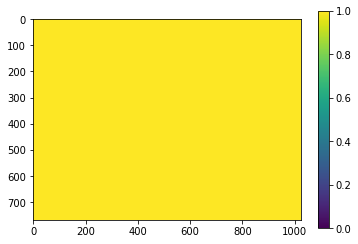

In [3]:
# There are two builtin states for the device, all white (ones) all black (zeros)
dmd.apply_blackout()
dmd.apply_whiteout()

# We'll now have a track of what we expect the DMD to look like, which is all ones
print(dmd.current_dmd_shape)
# And a plot of the expected shape.

Message: :00200000000020C0 sucessfully written.
Message: :0801000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF77 sucessfully written.
Message: :00230001000300D9 sucessfully written.
Message: :0007000000F9 sucessfully written.
Message: :00200000000020C0 sucessfully written.
Message: :08010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000F7 sucessfully written.
Message: :00230001000027B5 sucessfully written.
Message: :0801002800FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

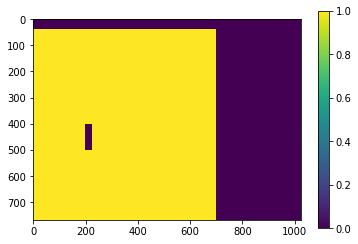

In [4]:
# Now let's apply a more interesting shape 
test_shape = np.ones((768, 1024)) # This is the size of the DLP7000
# Throw in some stripes and squares
test_shape[0:40, :] = 0
test_shape[:, 700:] = 0
test_shape[400:500, 200:225] = 0

dmd.apply_shape(test_shape)

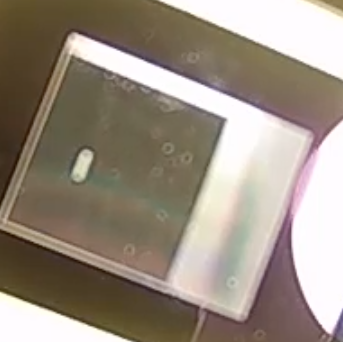

In [5]:
# And how does that match up to the controller?
Image('./examples/random_squares.png')

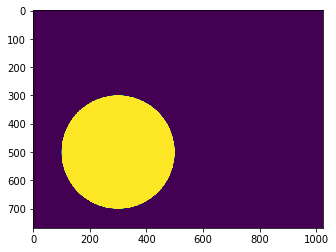

In [6]:
# For fun, we can also apply less useful for spectroscopy, but more interesting shapes...

# We'll use some photutils tools to make a big circle
# This is a great test of command accuracy as it's pretty obvious if sections are flipped or out of place
aperture = CircularAperture([300, 500], r=200)
mask = aperture.to_mask()
projected_mask = mask.to_image(test_shape.shape)

plt.imshow(projected_mask)

Message: :00200000000020C0 sucessfully written.
Message: :08010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000F7 sucessfully written.
Message: :00230001000300D9 sucessfully written.
Message: :0007000000F9 sucessfully written.
Message: :00200000000020C0 sucessfully written.
Message: :0801012C000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000CA sucessfully written.
Message: :0801012D00000000000000000000000000000000000000000000000000000000000000000000000001FFFFFFC00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Message: :0801014600000000000000000000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000AC sucessfully written.
Message: :0801014700000000000000000000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000089 sucessfully written.
Message: :080101480000000000000000000000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF80000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000047 sucessfully written.
Message: :080101490000000000000000000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801016200000000000000000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000BE sucessfully written.
Message: :080101630000000000000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000AD sucessfully written.
Message: :080101640000000000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000098 sucessfully written.
Message: :080101650000000000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801017E0000000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF80000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000098 sucessfully written.
Message: :0801017F0000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000083 sucessfully written.
Message: :080101800000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000060 sucessfully written.
Message: :080101810000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801019A000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000006C sucessfully written.
Message: :0801019B000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000049 sucessfully written.
Message: :0801019C000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000048 sucessfully written.
Message: :0801019D000000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :080101B6000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000AE sucessfully written.
Message: :080101B7000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000AD sucessfully written.
Message: :080101B8000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000008A sucessfully written.
Message: :080101B9000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :080101D20000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000D5 sucessfully written.
Message: :080101D30000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000D4 sucessfully written.
Message: :080101D40000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000D3 sucessfully written.
Message: :080101D50000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :080101EE0000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000042 sucessfully written.
Message: :080101EF0000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000041 sucessfully written.
Message: :080101F00000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000040 sucessfully written.
Message: :080101F10000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801020A0000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000039 sucessfully written.
Message: :0801020B0000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000038 sucessfully written.
Message: :0801020C0000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000059 sucessfully written.
Message: :0801020D0000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801022600000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000E3 sucessfully written.
Message: :0801022700000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF8000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000F6 sucessfully written.
Message: :0801022800000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF8000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000F5 sucessfully written.
Message: :0801022900000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801024200000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000E9 sucessfully written.
Message: :0801024300000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000E8 sucessfully written.
Message: :0801024400000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000FB sucessfully written.
Message: :0801024500000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801025E00000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF8000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000B9 sucessfully written.
Message: :0801025F00000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF8000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000B8 sucessfully written.
Message: :08010260000000000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000C7 sucessfully written.
Message: :08010261000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :0801027A00000000000000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000020 sucessfully written.
Message: :0801027B00000000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000060 sucessfully written.
Message: :0801027C00000000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000081 sucessfully written.
Message: :0801027D00000000000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :08010296000000000000000000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF80000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000FC sucessfully written.
Message: :080102970000000000000000000000000000000000000000000000003FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFE000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003C sucessfully written.
Message: :080102980000000000000000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFC000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000005D sucessfully written.
Message: :0801029900000000000000000000000000000000000000000000000007FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

Message: :080102B200000000000000000000000000000000000000000000000000000000000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF8000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000D2 sucessfully written.
Message: :080102B3000000000000000000000000000000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFC000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000034 sucessfully written.
Message: :080102B40000000000000000000000000000000000000000000000000000000000000001FFFFFFFFFFFFFFFFFFFFFFFFFFC000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000008D sucessfully written.
Message: :080102B500000000000000000000000000000000000000000000000000000000000000003FFFFFFFFFFFFFFFFF

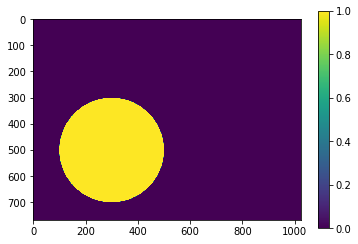

In [7]:
# And let's apply it
# This one will take a minute as every row of the circle must be written individually
dmd.apply_shape(projected_mask)

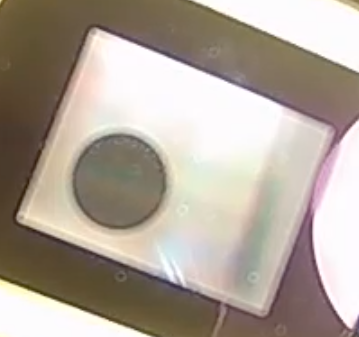

In [8]:
# And let's see how we did
Image('./examples/circle.png')